# TD1 : Graph learning on Facebook data

## Import of librairies

In [70]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import collections

# Open the Facebook graph

In [71]:
edges = pd.read_csv('facebook_combined.txt', sep=' ', header=None).rename(columns={0: 'source', 1: 'target'})

In [72]:
edges.head()

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [73]:
edges.shape

(88234, 2)

## Adjacency matrix plot

In [74]:
adjacency_matrix = np.zeros((edges.values.max()+1, edges.values.max()+1))

for ligne in edges.iterrows():
    adjacency_matrix[ligne[1]['source'], ligne[1]['target']] = 1
    adjacency_matrix[ligne[1]['target'], ligne[1]['source']] = 1


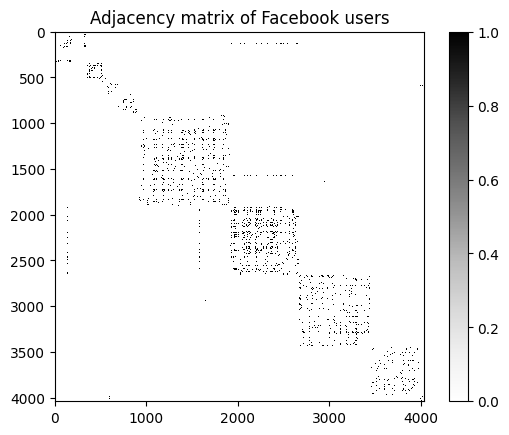

In [75]:
plt.imshow(adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.title("Adjacency matrix of Facebook users")
plt.colorbar()
plt.show()

We see some "blocks" in the adjacency matrix. This may mean, in the case of Facebook, clusters of users who are friends together, based on their geographic location.

## Degrees

As the graph is undirected, the degrees in and out are the same, thus, we only need to compute one kind of degree.

In [76]:
degrees = np.zeros(edges.values.max() + 1)
degrees = np.sum(adjacency_matrix, axis = 1).astype(int)
degrees

array([347,  17,  10, ...,   2,   4,   9])

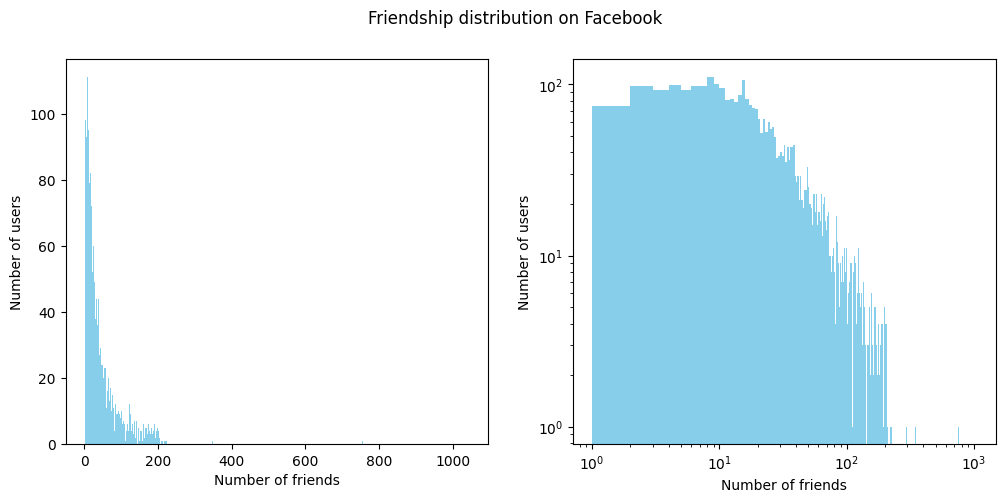

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))
fig.suptitle("Friendship distribution on Facebook")

ax[0].hist(degrees, bins = range(min(degrees), max(degrees) + 1), color = "skyblue")
ax[0].set_xlabel("Number of friends")
ax[0].set_ylabel("Number of users")

ax[1].hist(degrees, bins = range(min(degrees), max(degrees) + 1), color = "skyblue")
ax[1].set_xlabel("Number of friends")
ax[1].set_ylabel("Number of users")
ax[1].set_xscale("log")
ax[1].set_yscale("log")

The first graphic shows that most users have between 0 and 200 friends, with an exponential decline (from the second graphic).

Text(0.5, 1.0, 'LogLog Distribution of Facebook friendship')

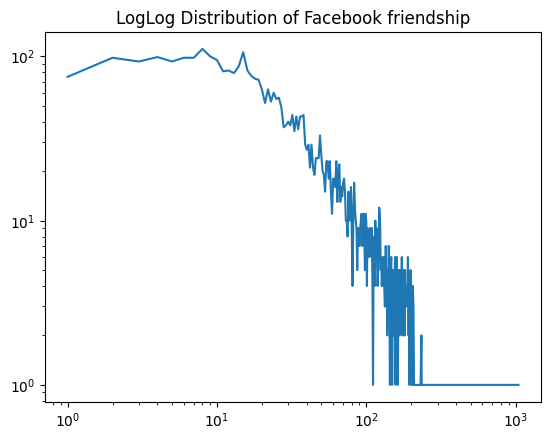

In [78]:
dico = collections.Counter(sorted(degrees))
plt.loglog(dico.keys(), dico.values())
plt.title("LogLog Distribution of Facebook friendship")

The number of friends of a user declined exponentially.

## Transitivity

In [79]:
A3 = np.linalg.matrix_power(adjacency_matrix, 3)
    
triangles = np.trace(A3) // 6
degrees = np.sum(adjacency_matrix, axis=1)
triplets = np.sum(degrees * (degrees - 1)) // 2
    
transitivity = (3 * triangles) / triplets if triplets != 0 else 0

print(f"Transitivity of the Facebook network: {transitivity:.3f}")

Transitivity of the Facebook network: 0.519


This transitivity means that there is a probability of 0.519 that the friend of my friend is my friend also.

## Networkx library

In [80]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(range(edges.values.max() + 1))
G.add_edges_from(edges.values)

G.number_of_nodes(), G.number_of_edges()

(4039, 88234)

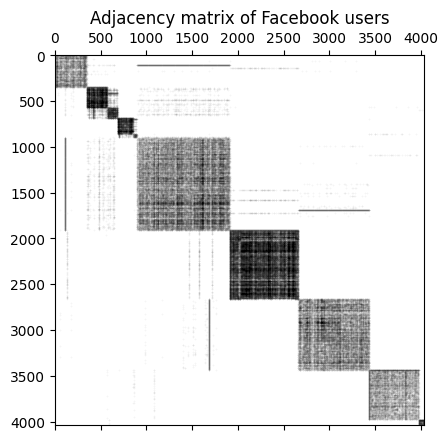

In [85]:
# Adjaency matrix

A = nx.adjacency_matrix(G)
plt.spy(A, markersize=0.01, color='black')
plt.title("Adjacency matrix of Facebook users")
plt.show()

In [86]:
# Transitivity

transitivity = nx.transitivity(G)
print(f"Transitivity of the Facebook network: {transitivity:.3f}")

Transitivity of the Facebook network: 0.519


# Try on Twitch graph

In [87]:
nodes = pd.read_csv("large_twitch_features.csv", sep = ",")
nodes.head()

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0


In [88]:
edges = pd.read_csv("large_twitch_edges.csv", sep = ",").rename(columns = {"numeric_id_1": "source", "numeric_id_2": "target"})
edges.head()

,source,target
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [89]:
nodes.shape, edges.shape

((168114, 9), (6797557, 2))

The graph is very large, so we will need specific methods to use it with efficiency.

## Adjacency matrix plot

In [90]:
from scipy.sparse import coo_matrix

adjacency_matrix = coo_matrix((np.ones(edges.shape[0]), (edges["source"], edges["target"])), shape = (nodes.shape[0], nodes.shape[0]))
adjacency_matrix

<168114x168114 sparse matrix of type '<class 'numpy.float64'>'
	with 6797557 stored elements in COOrdinate format>

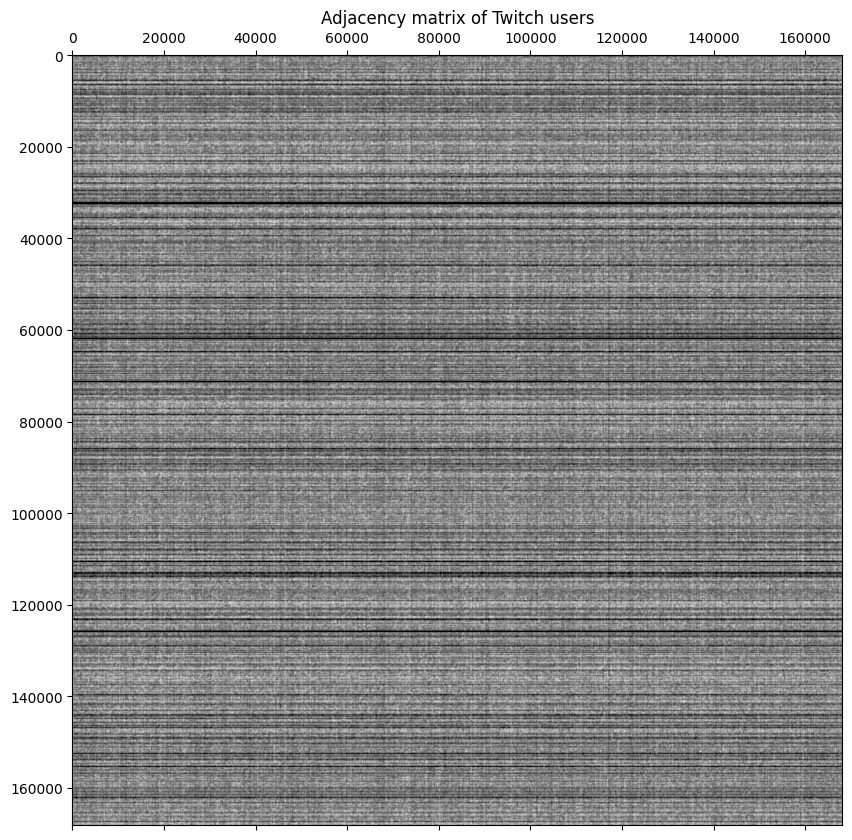

In [91]:
import scipy.sparse as sparse

plt.figure(figsize = (10, 10))
plt.spy(adjacency_matrix, markersize = 0.005, color = "black")
plt.title("Adjacency matrix of Twitch users")
plt.show()

## Degrees

In [92]:
degrees_out = np.sum(adjacency_matrix, axis=1).astype(int).flatten().tolist()
degrees_out = [degree for sublist in degrees_out for degree in sublist]
degrees_in = np.sum(adjacency_matrix, axis=0).astype(int).flatten().tolist()
degrees_in = [degree for sublist in degrees_in for degree in sublist]

print("Out-degrees:", degrees_out)
print("In-degrees:", degrees_in)

Out-degrees: [9, 49, 20, 0, 5, 20, 0, 1, 14, 4, 9, 2040, 0, 0, 11, 57, 0, 42, 0, 4, 0, 65, 44, 32, 25, 0, 3, 1, 12, 1, 13, 0, 1, 2, 2, 0, 0, 4, 3, 24, 19, 1, 8, 2, 7, 22, 2, 54, 10, 16, 101, 8, 0, 3, 8, 6, 29, 1, 0, 0, 144, 0, 0, 15, 6, 0, 2, 27, 6, 0, 0, 0, 11, 96, 2, 0, 4, 10, 3, 0, 8, 246, 9, 255, 16, 1517, 23, 10, 5, 4, 62, 10, 2, 0, 4, 13, 0, 124, 0, 0, 7, 70, 2, 27, 67, 0, 1, 29, 0, 12, 11, 331, 1, 18, 5, 9, 2843, 588, 108, 2, 0, 0, 0, 14, 9, 1, 2, 0, 0, 100, 18, 4, 156, 0, 9, 2, 14, 113, 0, 12, 1, 1, 25, 0, 0, 0, 4, 0, 46, 7, 20, 9, 2207, 9, 25, 8, 0, 0, 3, 0, 0, 0, 0, 43, 1, 9, 5, 8, 0, 28, 68, 1, 1, 0, 3, 15, 2, 0, 0, 5, 42, 0, 0, 101, 535, 0, 10, 3, 120, 21, 0, 2, 17, 19, 13, 12, 539, 379, 0, 1, 8, 0, 15, 637, 24, 0, 2, 16, 9, 27, 26, 22, 48, 0, 0, 0, 0, 19, 9, 5, 1, 0, 1, 87, 53, 3, 58, 0, 0, 37, 18, 7, 2, 0, 0, 1, 204, 4, 12, 4, 5, 93, 155, 0, 2, 514, 0, 6, 0, 90, 3, 0, 0, 2, 9, 63, 61, 1, 1, 3, 0, 113, 0, 3, 0, 0, 16, 1, 9, 186, 3, 50, 1, 0, 50, 8, 12, 12, 43, 34, 12, 7, 3

Text(0, 0.5, 'Number of users')

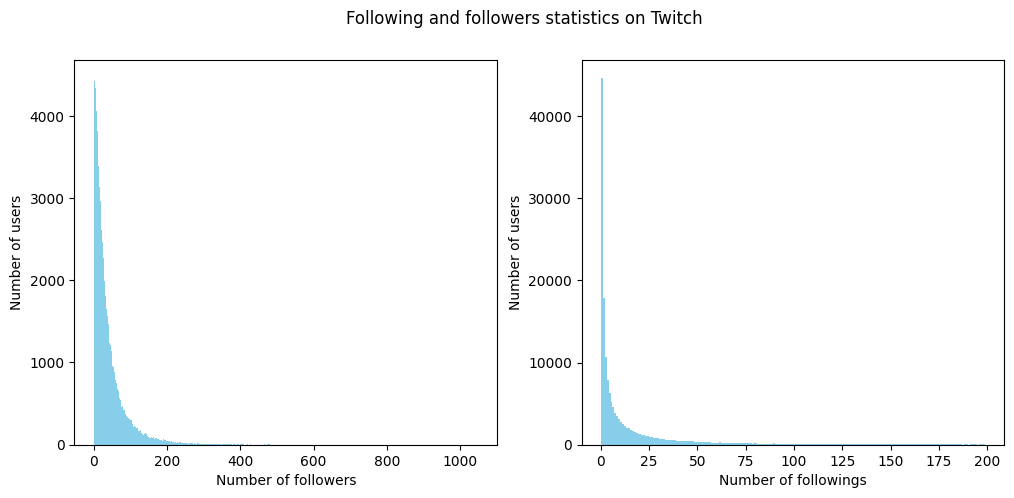

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 5))
fig.suptitle("Following and followers statistics on Twitch")

ax[0].hist(degrees_in, bins = range(min(degrees_in), max(degrees_in) + 1), color = "skyblue")
ax[0].set_xlabel("Number of followers")
ax[0].set_ylabel("Number of users")

ax[1].hist(degrees_out, bins = range(0, 200), color = "skyblue")
ax[1].set_xlabel("Number of followings")
ax[1].set_ylabel("Number of users")

Most users are followed by between 0 and 200 people. Most users follow between 0 and 50 Twitch streamers.

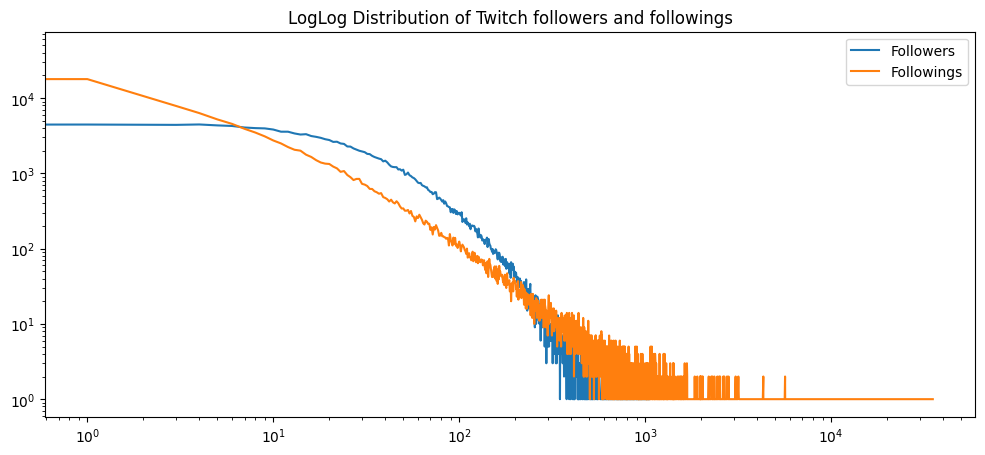

In [94]:
coun_in = collections.Counter(sorted(degrees_in))
coun_out = collections.Counter(sorted(degrees_out))

plt.figure(figsize = (12, 5))
plt.title("LogLog Distribution of Twitch followers and followings")
plt.loglog(coun_in.keys(), coun_in.values(), label = "Followers")
plt.loglog(coun_out.keys(), coun_out.values(), label = "Followings")
plt.legend()